**Project:** Data Mining I (2025/26)

**Group:** 15

**Members:**
- Beatriz Boura - 20250272
- Dinis Gaspar - 20221869
- Leonor Cardoso - 20250546
- Margarida Cruz - 20221929

**Table of contents**<a id='toc0_'></a>    
1. [Imports](#toc1_)    
2. [Introduction](#toc2_)    
3. [Analysis of Disciplinary Failure](#toc3_)    
4. [Modeling](#toc4_)    
4.1. [First Run](#toc4_1_)    
4.1.1. [Dimensionality Reduction - UMAP](#toc4_1_1_)    
4.1.2. [KMeans](#toc4_1_2_)    
4.1.3. [Hierarchical clustering](#toc4_1_3_)    
4.1.4. [DBSCAN](#toc4_1_4_)    
4.1.5. [SOM](#toc4_1_5_)    
4.1.6. [Analysis of first run](#toc4_1_6_)    
4.2. [Second Run](#toc4_2_)    
4.2.1. [Dimensionality Reduction - UMAP](#toc4_2_1_)    
4.2.2. [KMeans](#toc4_2_2_)    
4.2.3. [Hierarchical clustering](#toc4_2_3_)    
4.2.4. [DBSCAN](#toc4_2_4_)    
4.2.5. [Analysis of second run](#toc4_2_5_)    
5. [Cluster Variable Importance](#toc5_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=true
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# 1. <a id='toc1_'></a>[Imports](#toc0_)

As always, we'll start by importing the libraries we need.

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from utils_clustering import (visualize_dimensionality_reduction)

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.ensemble import RandomForestClassifier
from scipy.cluster.hierarchy import linkage, dendrogram
#import sompy
#from sompy.sompy import SOMFactory
import umap


import warnings
warnings.filterwarnings('ignore')

pd.options.display.float_format = '{:.2f}'.format
sns.set_palette('tab10')
pd.set_option("display.max_columns", None)

In [68]:
%cd ..
%cd Datasets
data_for_modeling = pd.read_csv('data_for_modeling.csv', index_col=0)
unclassified_data = pd.read_csv('data_for_analysis.csv', index_col=0)

c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project
c:\Users\dinis\OneDrive\Ambiente de Trabalho\Faculdade - MGI-BI\1º ano\1º Semestre\Data Mining I\Project\DM_Project\Datasets


# 2. <a id='toc2_'></a>[Introduction](#toc0_)

Now that some insights have already been taken and the data is preprocessed and ready for and modeling from our work in the "EDA_Preprocessing" notebook, this notebook will detail the process of obtaining the clusters that best describe our data.

Firstly, we'll just take a look at the datasets that will be used:
- **unclassified_data** - Includes absences that haven't been assigned a final cluster, this is the dataset that we will use to evaluate different clustering solutions, this is the data_for_analysis dataset we exported in the EDA_Preprocessing notebook.
- **data_for_modelling** - The scaled data we will use to train our models in cases where we don't wish to perform any aditional transformations to the data.
- **classified_data** - Once we start assigning final clusters to absneces, we'll have a dataset which includes absences that have been assigned to a cluster. This is the dataste that will be exported and used for a detailed analysis of our final clusters in the "Cluster_analysis" notebook.

In [69]:
data_for_modeling

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_of_absence_sin,month_of_absence_cos,day_of_the_week_sin,day_of_the_week_cos,reason_for_absence_Chronic Disease,reason_for_absence_Maternity/Pregnancy-Related,reason_for_absence_Medical Care,reason_for_absence_Mental Disease,reason_for_absence_Unjustified absence,reason_for_absence_Unspecified
0,0.79,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,1,0
1,-1.32,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
2,-0.57,0.00,-0.50,0.00,0.86,-0.17,0.11,0.00,-0.90,0.00,-0.50,-0.87,0.00,-1.00,0,0,1,0,0,0
3,0.67,0.00,0.50,0.00,-0.14,0.17,0.22,0.00,3.73,0.00,-0.50,-0.87,-0.87,-0.50,0,0,0,0,0,0
4,0.79,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,-0.87,-0.50,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,0.79,0.00,0.50,1.00,0.71,0.83,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
796,0.12,0.00,0.00,1.00,0.57,0.17,0.00,1.00,2.22,-1.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
797,-1.32,0.00,0.00,4.00,1.29,-0.50,0.33,0.00,-0.04,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
798,0.07,0.00,0.50,2.00,1.43,-0.50,0.22,0.00,-0.36,0.00,-0.50,-0.87,0.00,-1.00,0,0,0,0,0,1


In [70]:
unclassified_data

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified
0,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
3,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
4,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,289.00,0.00,2.00,1.00,30.00,8.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
796,235.00,0.00,1.00,1.00,29.00,4.00,37.00,1.00,21.36,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
797,118.00,0.00,1.00,4.00,34.00,0.00,40.00,0.00,8.43,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
798,231.00,0.00,2.00,2.00,35.00,0.00,39.00,0.00,6.60,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [71]:
# This variable will be used to filter data to
# ensure that unwanted cluster variables don't show 
# up when looking at cluster centroids 
cols_for_analysis = list(unclassified_data.columns)

# 3. <a id='toc3_'></a>[Analysis of Disciplinary Failure](#toc0_)

From the Exploratory Data Analysis performed in the EDA_Preprocessing notebook, we believed that analyzing absences of disciplinary failue against those which aren't may allow us to find our first cluster through data analysis, before we start modeling.

In [72]:
unclassified_data.loc[:, cols_for_analysis].groupby('disciplinary_failure').mean().T

disciplinary_failure,0.00,1.00
transportation_expense,220.55,252.16
number_of_children,1.04,1.39
number_of_pets,0.69,0.77
body_mass_index,26.58,28.02
absenteeism_time_in_hours,6.16,0.00
age,36.26,39.05
higher_education,0.18,0.09
commute_cost_per_km,9.25,11.46
risk_behavior,0.61,0.82
month_January,0.07,0.00


From this analysis we conclude that actually this variable, whilst it does present some different patterns, they are generally not distinct or relevant enough to warrant considering absences with disciplinary failure as its separate cluster. With this in mind, we will carry on into the modeling stage with these observations in the data, as well as the disciplinary_failure variable, as it may have underlying patterns coupled with patterns of other variables.

# 4. <a id='toc4_'></a>[Modeling](#toc0_)

## 4.1. <a id='toc4_1_'></a>[First Run](#toc0_)

### 4.1.1. <a id='toc4_1_1_'></a>[Dimensionality Reduction - UMAP](#toc0_)

UMAP, short for Uniform Manifold Approximation and Projection, is a dimensionality reduction technique based on a graph theory approach that attempts to preserve the local structure of the data while reducing its dimensionality.

The algorithm works by constructing a high-dimensional graph of the data points, where each point is connected to its nearest neighbors. It then optimizes a low-dimensional representation of the graph by minimizing the cross-entropy between the high-dimensional and low-dimensional graphs. This results in a low-dimensional embedding that retains the local structure of the original data, making it useful for visualization, clustering, and classification tasks.

We will use UMAP to build a 2-dimensional reduction of our data, which we will then use as a guide for the quality of our clusters, obviously considering the patterns that are found as the primary point of analysis. This is simply a tool to allow us to visualize an approximation of our data and clustering solutions, **never used for actual modeling**. It is worth mentioning that the axis (or dimensions) of a UMAP reduction when plotted have no interpretable meaning. Finally, the parameters we chose can from studying the UMAP documentation for references followed by some tests until a satisfactory plot was found. 

We'll use the visualize_dimensionality_reduction function from the utils_clustering.py file to visualize this dimensionality reduction in regards to labels of clustering solutions.

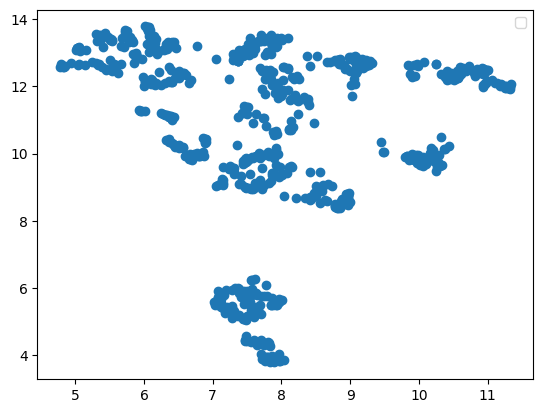

In [73]:
umap_original = umap.UMAP(n_neighbors = 100, random_state = 0, min_dist=0.01).fit_transform(data_for_modeling)
plt.scatter(umap_original[:,0], umap_original[:,1])
plt.legend()
plt.show()

### 4.1.2. <a id='toc4_1_2_'></a>[KMeans](#toc0_)

The first model we will test is KMeans, as usual the first step in KMeans in to plot the elbow curve to get an indication for the number of clusters (k) we should try first.

In [74]:
k_list = np.arange(1, 16)
inertia = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_modeling)
    inertia.append(kmeans.inertia_)

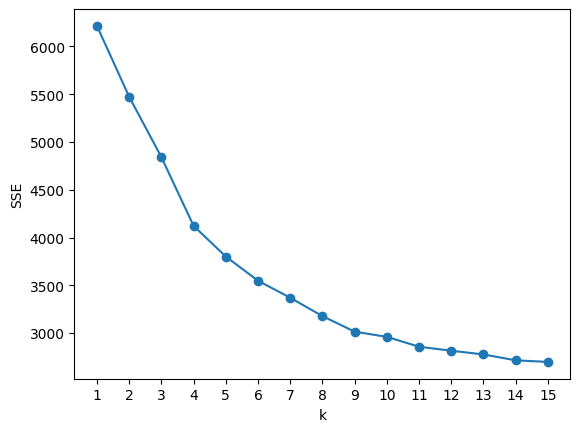

In [75]:
plt.plot(k_list, inertia, marker='o')
# define the label for x axis as 'k' (the number of clusters)
plt.xlabel('k')
# define the label for y axis as 'SSE' (the best metric for evaluating KMeans clustering, a.k.a Intertia)
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(k_list)
# call plt.show()
plt.show()

Looking at the elbow plot, there are, in our opinion two potential elbows, At k=4 and k=9. We believe k=9 is  the best choice, since between 4 and 9 there are still significant drops in inertia, but after 9 the inertia starts to tail off and drop very slowly. As such, we will now fit a KMeans model for 9 clusters.

In [76]:
kmeans = KMeans(n_clusters=9, random_state=0)
unclassified_data['cluster_kmeans'] = kmeans.fit_predict(data_for_modeling)


In [77]:
cluster_kmeans1_size = unclassified_data.groupby('cluster_kmeans').size()
cluster_kmeans1_size

cluster_kmeans
0     69
1    111
2     94
3     48
4     91
5     75
6     56
7    139
8     91
dtype: int64

In [78]:
map_cluster_kmeans1 = {0: 'Costly Commutes',
                      1: 'No Kids or pets, High BMI',
                      2: 'Undefined',
                      3: 'A lot of pets',
                      4: 'Younger employees',
                      5: 'Fit and educated employees',
                      6: 'Long Absences',
                      7: 'Risky Behaviors',
                      8: 'Uneducated and undisciplined'}
unclassified_data['cluster_kmeans_mapped'] = unclassified_data['cluster_kmeans'].map(map_cluster_kmeans1)

In [79]:
cluster_centroids_kmeans = unclassified_data.loc[:, cols_for_analysis + ['cluster_kmeans']].groupby('cluster_kmeans').mean().reset_index()
cluster_centroids_kmeans['cluster_kmeans'] = cluster_centroids_kmeans['cluster_kmeans'].map(map_cluster_kmeans1)
cluster_centroids_kmeans.T

,0,1,2,3,4,5,6,7,8
cluster_kmeans,Costly Commutes,"No Kids or pets, High BMI",Undefined,A lot of pets,Younger employees,Fit and educated employees,Long Absences,Risky Behaviors,Uneducated and undisciplined
transportation_expense,296.13,179.00,146.96,321.33,221.84,182.93,219.18,275.13,199.30
disciplinary_failure,0.13,0.02,0.00,0.10,0.02,0.01,0.00,0.09,0.14
number_of_children,1.13,0.00,0.62,1.15,1.13,0.37,1.32,2.18,1.34
number_of_pets,0.35,0.00,0.00,4.00,2.00,0.00,0.29,0.55,0.53
body_mass_index,26.26,31.00,26.24,26.02,24.26,20.44,26.05,25.42,32.21
absenteeism_time_in_hours,5.58,3.42,3.70,5.77,3.74,3.97,26.32,5.04,3.25
age,34.04,38.00,36.72,32.42,28.44,31.57,38.50,36.88,48.07
higher_education,0.67,0.00,0.10,0.17,0.04,0.81,0.07,0.01,0.00
commute_cost_per_km,22.05,3.51,11.63,6.84,8.74,7.31,10.58,7.69,10.11


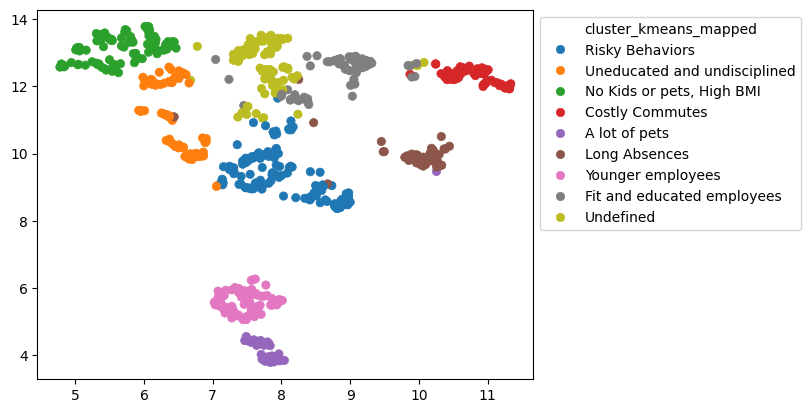

In [80]:
visualize_dimensionality_reduction(umap_original, unclassified_data['cluster_kmeans_mapped'])

In [81]:
silhouette_score(data_for_modeling, unclassified_data['cluster_kmeans_mapped'])

0.18855704223299224

Looking at the cluster centroids, coupled with the UMAP dimensionality reduction, the KMeans model was able perform a decent job. In our opinion, the KMeans model was able to clearly identify 5 clusters: "A lot of Pets", "Younger employees", "Long absences", "Costly Commutes" and "No kids or pets, High BMI". The remaining 4 clusters are still quite mixed in this clustering solution. We won't assign any final clusters yet, but those 5 clusters mentioned above are strong candidates. The silhouette score also indicates that our model is performing at a decent level.<p>
**Note:** We also tested a solution with 8 clusters, which isn't shown to avoid overcrowding the notebook, and the results were ultimately very similar, but slightly worse and led to essentially the same conclusions.

### 4.1.3. <a id='toc4_1_3_'></a>[Hierarchical clustering](#toc0_)

The second technique we will experiment with is Hierarchical clustering, much like KMeans the first step concerns the discovery of the number of clusters, which in this case is done using a Dendrogram.

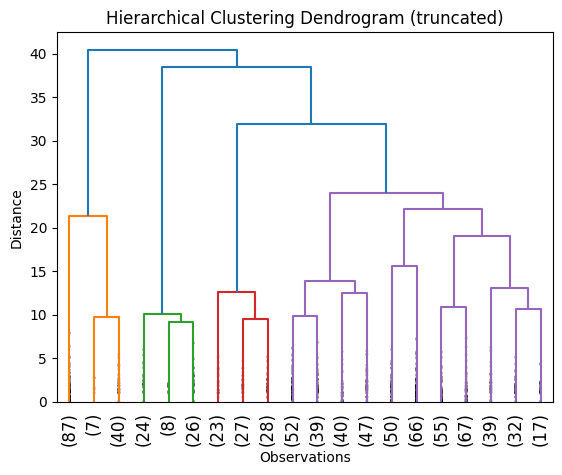

In [82]:
hierarchical = linkage(data_for_modeling, 'ward')
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hierarchical,
    truncate_mode='lastp',
    p=20,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

Looking at the dendrogram it seems that 8 clusters is the adequate number of clusters for our data. This differs from KMeans, but we will still choose 8 for our Hierarchical model.

In [83]:
hierarchical = AgglomerativeClustering(n_clusters=8, linkage='ward')
unclassified_data['cluster_hierarchical'] = hierarchical.fit_predict(data_for_modeling)

In [84]:
cluster_hierarchical1_size = unclassified_data.groupby('cluster_hierarchical').size()
cluster_hierarchical1_size

cluster_hierarchical
0    116
1    178
2     88
3     78
4     47
5     58
6     87
7    122
dtype: int64

In [85]:
map_cluster_hierarchical1 = {0: 'Somewhat educated and fit',
                      1: 'Risky Behaviors' ,
                      2: 'Oldest employees, high BMI',
                      3: 'Costly Commutes',
                      4: 'A lot of pets',
                      5: 'Long Absences',
                      6: 'Clean employees',
                      7: 'No Kids or pets, High BMI'}
unclassified_data['cluster_hierarchical_mapped'] = unclassified_data['cluster_hierarchical'].map(map_cluster_hierarchical1)

In [86]:
cluster_centroids_hierarchical = unclassified_data.loc[:, cols_for_analysis + ['cluster_hierarchical']].groupby('cluster_hierarchical').mean().reset_index()
cluster_centroids_hierarchical['cluster_hierarchical'] = cluster_centroids_hierarchical['cluster_hierarchical'].map(map_cluster_hierarchical1)
cluster_centroids_hierarchical.T

,0,1,2,3,4,5,6,7
cluster_hierarchical,Somewhat educated and fit,Risky Behaviors,"Oldest employees, high BMI",Costly Commutes,A lot of pets,Long Absences,Clean employees,"No Kids or pets, High BMI"
transportation_expense,148.30,255.60,198.81,288.56,320.49,215.69,221.69,184.73
disciplinary_failure,0.00,0.07,0.12,0.12,0.11,0.00,0.02,0.03
number_of_children,0.24,2.06,1.34,1.10,1.15,1.22,1.09,0.02
number_of_pets,0.00,0.44,0.49,0.41,4.00,0.34,2.00,0.02
body_mass_index,23.98,25.01,32.16,26.27,26.00,25.93,24.09,30.31
absenteeism_time_in_hours,3.43,5.14,3.45,5.29,5.26,26.21,3.67,3.14
age,33.34,37.03,48.17,33.60,32.51,37.62,28.46,38.39
higher_education,0.34,0.13,0.00,0.71,0.17,0.12,0.00,0.00
commute_cost_per_km,9.63,8.08,10.25,21.22,6.83,10.25,8.46,4.04


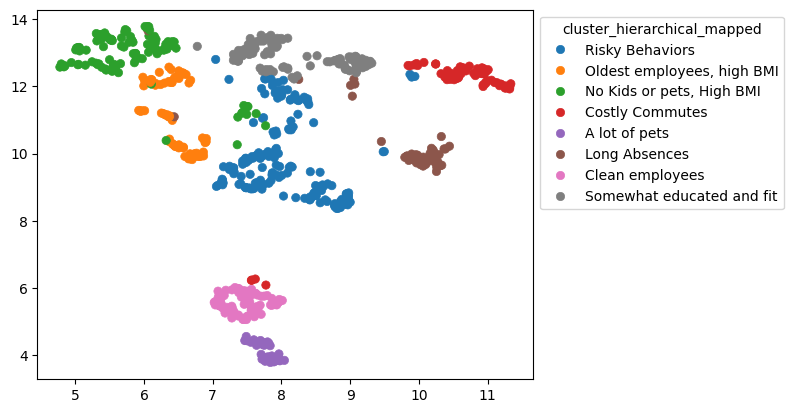

In [87]:
visualize_dimensionality_reduction(umap_original, unclassified_data['cluster_hierarchical_mapped'])

In [88]:
silhouette_score(data_for_modeling, unclassified_data['cluster_hierarchical_mapped'])

0.17216940485752186

Looking at the cluster means and the UMAP dimensionality reduction, the results are good, but the results from the KMeans we performed above are better. Again there are some good clusters, like with KMeans. The silhouette score for this method is slightly lower than KMeans which supports the idea that KMeans is a better solution so far.<p>
**Note:** Like with KMeans, we also tried a solution with 9 clusters which led to very similar results to this 8 cluster solution.

### 4.1.4. <a id='toc4_1_4_'></a>[DBSCAN](#toc0_)

We'll now try a density-based method to see if we are able to find different types of patterns in our data, compared to those we found with KMeans and Hierarchical clustering, which generally find more clusters with more predictable shapes, often called more "spherical" clusters.

In [89]:
dbscan = DBSCAN(eps=1.75, min_samples=21,  n_jobs=-1)
unclassified_data['cluster_dbscan'] = dbscan.fit_predict(data_for_modeling)


In [90]:
unclassified_data.groupby('cluster_dbscan').size()

cluster_dbscan
-1    487
 0    109
 1     30
 2     30
 3     75
 4     43
dtype: int64

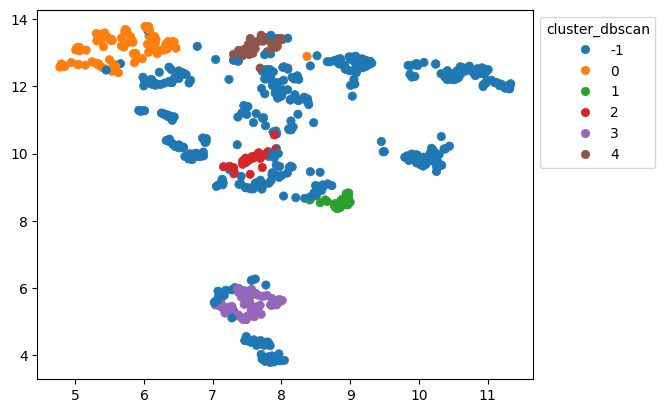

In [91]:
visualize_dimensionality_reduction(umap_original, unclassified_data['cluster_dbscan'])

In [92]:
silhouette_score(data_for_modeling, unclassified_data['cluster_dbscan'])

-0.022850202595052112

Unforntunately, through testing of various parameter combinations, we were not able to produce any meaningful results using DBSCAN. One of 2 things generally happened:
+ We have a high number of small clusters and a large proportion of observations classified as outliers.
+ We have few outliers, but the data converges on a couple of low-quality clusters.

So while it did uncover some patterns, KMeans and hierarchical methods significantly outperformed it. We will test it again if (when) we classify a portion of our data, based on one of our models, and then run models on the remaining data. 
The negative silhouette score confirms that this parameter combination (close to the best we could find) is not producing very valuable clusters.

### 4.1.5. <a id='toc4_1_5_'></a>[SOM](#toc0_)

The final algorithm we will test is a Self-Organizing map (SOM). <p>
**Note:** The cells in this section will be commented (in markdown cells), due to package version compatibility issues with the SOMPY package and its numpy requirements in particular (namely UMAP, but perhaps others too),  with relevant outputs shown as images and an export of the final cluster labels. This allows for this section to be analyzed without installing SOMPY and dealing with the adjacent complications. To be clear, to run this specific section, other sections of the notebook will simply not work. For that reason, we recommend NOT running the code. The [SOM Results](#som_results) section contains the import of the results and runs inline with the rest of the notebook.<p>
If you wish to actually run the code in this section (Again, not recommended):
+ 1 - Uncomment and run the FIRST cell directly below (Comment again after running) to downgrade numpy to a SOMPY compatible version.
+ 2 - Restart the kernel
+ 3 - Uncomment and run the SECOND cell directly below (Comment again after running) to install the SOMPY package.
+ 4 - Restart the Kernel again (not strictly necessary, but recommended).
+ 5 - In the initial import cell, at the start of the notebook, uncomment the 2 lines used to import SOMPY and comment the line used to import UMAP.
+ 6 - Look for code-like cells below, remove the markdown formatting leaving just the code. Finally, transform those cells from markdown to code cells.
+ 7 - You can run this section.
+ 8 - To then run the rest of the notebook, update numpy. Restart the kernel and reverse step 5.

In [93]:
#! pip install numpy==1.26.4 --force-reinstall --upgrade

In [94]:
#! pip install scikit-image
#! pip install git+https://github.com/sevamoo/SOMPY.git#egg=SOMPY

Transforming the data into a numpy array (required by SOMPY)

```python
data_for_modeling_som = data_for_modeling.values
data_for_modeling_som 
```

Our map will be a 10 by 10 grid, this is because we want to ensure that we have enough neurons to allow them to map the feature space correctly. 

```python
rows = 10
cols = 10
mapsize = [rows, cols]
```

Now we're buliding our map, using all of our variables.

```python
som = SOMFactory().build(data_for_modeling_som, mapsize, mask=None,
                         mapshape='planar', 
                         lattice='rect',
                         normalization='var', 
                         initialization='pca', 
                         neighborhood='gaussian', 
                         training='batch') 
```

The next step is to run the training of the SOM. We'll use a relatively high number of epochs to try and achieve a good "fit" to our data. This is possible due to the fact the dataset is relatively small and thus the training time of the SOM is not very large.

```python
som.train(n_job=1, verbose='info', train_rough_len=100, train_finetune_len=10)
```

The two cells below will show the U-matrix and the component planes, which provide us with insights into the neurons of the network. These cells can be used to determine the number of clusters to use for clustering on top of the SOM units.

```python
u = sompy.umatrix.UMatrixView(rows, cols, title='U-matrix', show_axis=True, text_size=8, show_text=True)

#Here you have Umatrix plus its render
_, umat = u.show(som, distance=1, row_normalized=True, contour=True, blob=False)
```

![som umatrix](images/som_10x10_umatrix.png)

```python
som.component_names = data_for_modeling.columns
comp_planes = sompy.mapview.View2DPacked(rows, cols, 'Component Planes\n', text_size=8)
comp_planes.show(som, what='codebook', which_dim='all') 
```

![som component planes](images/som_10x10_component_planes.png)

Looking at the U-matrix and all of the component planes, coupled with information from the KMeans elbow plot and the dendrogram, we will cluster on top of our SOM using 8 clusters. For that, we will cluster the neurons in the map using SOMPY built-in methods, afterwards we will assign clusters to observations based on the cluster of best matching unit for each observation.

```python
clusters_som = som.cluster(n_clusters=8)
clusters_som
```

```python
bmus = som.project_data(data_for_modeling_som)
unclassified_data['bmu'] = bmus
```

```python
unclassified_data['label'] = clusters_som[unclassified_data['bmu']]
```

We will now plot a visualization that helps us see how the map was clustered.

```python
v = sompy.mapview.View2DPacked(width=10, height=10, title='Clusters K-Means', text_size=8)
v.show(som, what='cluster')
unclassified_data['label']
```

![som kmeans](images/som_10x10_Kmeans_8_clusters.png)

As expected different regions of the map were clustered into different groups. <p>
Finally, we will export the results of the clustering so that they can be analyzed in more depth, using the UMAP reduction (which requires a higher numpy version) among other techniques.

```python
unclassified_data['label'].to_csv('SOM_8_clusters_labels.csv')
```

#### 

In this section, the clusters produced by the SOM will be analyzed. We will merge the dataset of labels (renaming the labels to "cluster_som" to stay with the practice we have used) with the unclassified_data dataset we use for analysis and then look at our clusters and compare the quality of the solution.

In [95]:
som_8_cluster_labels = pd.read_csv('SOM_8_clusters_labels.csv', index_col=0).rename({'label':'cluster_som'}, axis=1)
som_8_cluster_labels

,cluster_som
0,5
1,5
2,1
3,0
4,0
...,...
795,0
796,6
797,0
798,0


In [96]:
unclassified_data = unclassified_data.join(som_8_cluster_labels)
unclassified_data

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified,cluster_kmeans,cluster_kmeans_mapped,cluster_hierarchical,cluster_hierarchical_mapped,cluster_dbscan,cluster_som
0,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,7,Risky Behaviors,1,Risky Behaviors,-1,5
1,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,8,Uneducated and undisciplined,2,"Oldest employees, high BMI",-1,5
2,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,"No Kids or pets, High BMI",7,"No Kids or pets, High BMI",0,1
3,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,Costly Commutes,3,Costly Commutes,-1,0
4,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,7,Risky Behaviors,1,Risky Behaviors,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,289.00,0.00,2.00,1.00,30.00,8.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,7,Risky Behaviors,1,Risky Behaviors,-1,0
796,235.00,0.00,1.00,1.00,29.00,4.00,37.00,1.00,21.36,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,Costly Commutes,3,Costly Commutes,-1,6
797,118.00,0.00,1.00,4.00,34.00,0.00,40.00,0.00,8.43,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,3,A lot of pets,4,A lot of pets,-1,0
798,231.00,0.00,2.00,2.00,35.00,0.00,39.00,0.00,6.60,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,8,Uneducated and undisciplined,1,Risky Behaviors,-1,0


In [97]:
unclassified_data.groupby('cluster_som').size()

cluster_som
0    120
1    181
2     80
3     40
4     85
5    159
6     53
7     56
dtype: int64

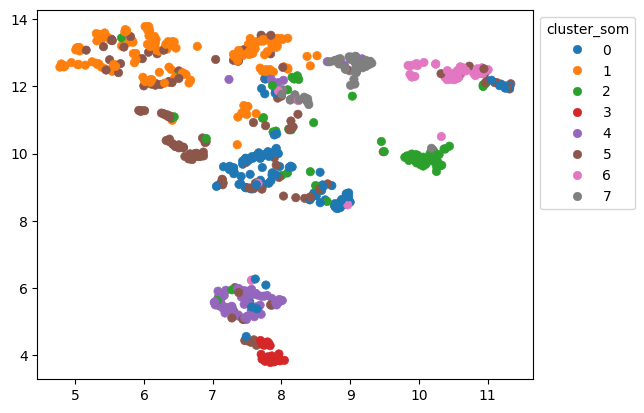

In [98]:
visualize_dimensionality_reduction(umap_original, unclassified_data['cluster_som'])

In [99]:
unclassified_data.loc[:, cols_for_analysis + ['cluster_som']].groupby('cluster_som').mean().T

cluster_som,0,1,2,3,4,5,6,7
transportation_expense,275.76,159.89,223.71,338.38,215.05,230.31,258.75,179.00
disciplinary_failure,0.00,0.00,0.00,0.07,0.00,0.26,0.00,0.00
number_of_children,2.35,0.24,1.32,1.18,1.05,1.23,0.66,0.43
number_of_pets,0.61,0.01,0.35,4.00,1.74,0.64,0.49,0.00
body_mass_index,25.41,29.38,25.98,24.75,23.89,29.31,26.55,19.64
absenteeism_time_in_hours,4.72,3.04,20.52,5.55,3.59,3.92,5.91,4.93
age,35.92,38.83,38.96,30.00,28.56,41.06,33.47,32.14
higher_education,0.05,0.00,0.03,0.20,0.00,0.06,0.96,1.00
commute_cost_per_km,9.30,6.97,11.05,6.60,8.34,10.27,18.68,7.15
risk_behavior,0.97,0.76,0.85,1.00,0.06,0.60,0.11,0.21


In [100]:
silhouette_score(data_for_modeling, unclassified_data['cluster_som'])

0.11971460090974091

We can conclude that while SOM clearly outperforms DBSCAN in all of our analytical tools, it isn't very close to the KMeans and Hierarchical methods we tested previously. 

### 4.1.6. <a id='toc4_1_6_'></a>[Analysis of first run](#toc0_)
As mentioned above, during our first run, only KMeans and Hierarchical clustering solutions provided results that truly allowed to definitively classify some of our observations, with KMeans seeming like the best option. We will now compare the cluster assignments of these two methods.

In [101]:
# The reset_index, set_index sequence is only there to produce a better visual output
unclassified_data.groupby(['cluster_kmeans_mapped', 'cluster_hierarchical_mapped']).size().reset_index().set_index(['cluster_kmeans_mapped', 'cluster_hierarchical_mapped'])

0
cluster_kmeans_mapped        cluster_hierarchical_mapped     
A lot of pets                A lot of pets                 47
                             Long Absences                  1
Costly Commutes              Costly Commutes               68
                             Risky Behaviors                1
Fit and educated employees   Costly Commutes                3
                             Long Absences                  4
                             No Kids or pets, High BMI      1
                             Risky Behaviors               18
                             Somewhat educated and fit     49
Long Absences                Long Absences                 52
                             Risky Behaviors                4
No Kids or pets, High BMI    Long Absences                  1
                             No Kids or pets, High BMI    110
Risky Behaviors              No Kids or pets, High BMI      2
                             Risky Behaviors              137
Undefined                    Costly Commutes                3
                             No Kids or pets, High BMI      7
                             Oldest employees, high BMI     1
                             Risky Behaviors               16
                             Somewhat educated and fit     67
Uneducated and undisciplined No Kids or pets, High BMI      2
                             Oldest employees, high BMI    87
                             Risky Behaviors                2
Younger employees            Clean employees               87
                             Costly Commutes                4

We can see that the models agree on the large majority of assignments. With this in mind, we will define "A lot of Pets", "Younger employees", "Long absences", "Costly Commutes" and "No kids or pets, High BMI" as the final clusters for the observations assigned to each of those clusters by the KMeans model as that model, in our opinion, performed slightly better than the Hierarchical method. Additionally, we will drop these observations from the data_for_modeling and unclassified_data observations. All other observations fall within regions of uncertainty, so we will perform further modeling to assign appropriate clusters to them.

In [102]:
clusters_to_finalize = ['No Kids or pets, High BMI', 'Costly Commutes', 'A lot of pets',
       'Long Absences', 'Younger employees']

In [103]:
# Creating a new dataset with only the rows in our defined final clusters: classified_data
classified_data = unclassified_data[unclassified_data['cluster_kmeans_mapped'].isin(clusters_to_finalize)].copy()
# Renaming the cluster variable to Final_Cluster and removing all other cluster variables from the classified_data dataset
classified_data.rename({'cluster_kmeans_mapped':'Final_Cluster'}, axis=1, inplace=True)
cluster_vars = list(classified_data.columns[classified_data.columns.str.startswith('cluster')]) 
classified_data.drop(cluster_vars, axis = 1, inplace=True)
classified_data

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified,Final_Cluster
2,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,"No Kids or pets, High BMI"
3,279.00,0.00,2.00,0.00,24.00,4.00,39.00,0.00,30.00,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Costly Commutes
5,179.00,0.00,0.00,0.00,31.00,2.00,38.00,0.00,3.51,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,"No Kids or pets, High BMI"
6,361.00,0.00,1.00,4.00,27.00,8.00,28.00,0.00,6.94,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,A lot of pets
8,155.00,0.00,2.00,0.00,25.00,30.00,34.00,0.00,12.92,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,Long Absences
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,361.00,0.00,1.00,4.00,27.00,8.00,28.00,0.00,6.94,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,A lot of pets
793,225.00,0.00,1.00,2.00,24.00,8.00,28.00,0.00,8.65,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,Younger employees
794,369.00,0.00,3.00,0.00,25.00,30.00,31.00,0.00,21.71,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,Long Absences
796,235.00,0.00,1.00,1.00,29.00,4.00,37.00,1.00,21.36,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,Costly Commutes


In [104]:
unclassified_data.drop(classified_data.index, inplace=True)
cluster_vars = list(unclassified_data.columns[unclassified_data.columns.str.startswith('cluster')]) 
unclassified_data.drop(cluster_vars, axis=1, inplace=True)
unclassified_data

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_January,month_February,month_March,month_April,month_May,month_June,month_July,month_August,month_September,month_October,month_November,month_December,is_mid_week,is_near_weekend,is_weekend,reason_Acute Disease,reason_Chronic Disease,reason_Maternity/Pregnancy-Related,reason_Medical Care,reason_Mental Disease,reason_Unjustified absence,reason_Unspecified
0,289.00,0.00,2.00,1.00,30.00,4.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0
1,118.00,1.00,1.00,0.00,31.00,0.00,50.00,0.00,9.08,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,289.00,0.00,2.00,1.00,30.00,2.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
7,260.00,0.00,4.00,0.00,23.00,4.00,36.00,0.00,5.20,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
10,260.00,0.00,4.00,0.00,23.00,8.00,36.00,0.00,5.20,1.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,118.00,0.00,0.00,0.00,28.00,4.00,37.00,0.00,11.80,0.00,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
791,118.00,0.00,0.00,0.00,28.00,2.00,37.00,0.00,11.80,0.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
795,289.00,0.00,2.00,1.00,30.00,8.00,33.00,0.00,8.03,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0
798,231.00,0.00,2.00,2.00,35.00,0.00,39.00,0.00,6.60,1.00,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [105]:
data_for_modeling.drop(classified_data.index, inplace=True)
data_for_modeling

,transportation_expense,disciplinary_failure,number_of_children,number_of_pets,body_mass_index,absenteeism_time_in_hours,age,higher_education,commute_cost_per_km,risk_behavior,month_of_absence_sin,month_of_absence_cos,day_of_the_week_sin,day_of_the_week_cos,reason_for_absence_Chronic Disease,reason_for_absence_Maternity/Pregnancy-Related,reason_for_absence_Medical Care,reason_for_absence_Mental Disease,reason_for_absence_Unjustified absence,reason_for_absence_Unspecified
0,0.79,0.00,0.50,1.00,0.71,0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,1,0
1,-1.32,1.00,0.00,0.00,0.86,-0.50,1.44,0.00,0.07,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,1
4,0.79,0.00,0.50,1.00,0.71,-0.17,-0.44,0.00,-0.11,0.00,-0.50,-0.87,-0.87,-0.50,0,0,1,0,0,0
7,0.43,0.00,1.50,0.00,-0.29,0.17,-0.11,0.00,-0.60,0.00,-0.50,-0.87,-0.87,0.50,0,0,1,0,0,0
10,0.43,0.00,1.50,0.00,-0.29,0.83,-0.11,0.00,-0.60,0.00,-0.50,-0.87,0.87,0.50,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
788,-1.32,0.00,-0.50,0.00,0.43,0.17,0.00,0.00,0.55,-1.00,-0.50,-0.87,0.87,0.50,0,0,1,0,0,0
791,-1.32,0.00,-0.50,0.00,0.43,-0.17,0.00,0.00,0.55,-1.00,-0.50,-0.87,0.00,-1.00,0,0,1,0,0,0
795,0.79,0.00,0.50,1.00,0.71,0.83,-0.44,0.00,-0.11,0.00,-0.50,-0.87,0.87,-0.50,0,0,0,0,0,0
798,0.07,0.00,0.50,2.00,1.43,-0.50,0.22,0.00,-0.36,0.00,-0.50,-0.87,0.00,-1.00,0,0,0,0,0,1


## 4.2. <a id='toc4_2_'></a>[Second Run](#toc0_)

Now that we have successfully classified almost half our data, we will re-run models, with the reduced dataset, aiming to find more localized patterns in the remainder of our data, that modeling with the full dataset may have missed. We will re-test the 2 methods that gave us good results (KMeans and Hierarchical) as well as DBSCAN to look for potentially different types of patterns (density patterns). <p> **Note:** We won't re-test SOM since the results were not very good and it's quite a difficult package to work with, due to version compatibility limitations.

### 4.2.1. <a id='toc4_2_1_'></a>[Dimensionality Reduction - UMAP](#toc0_)

Since we have classified a significant portion of our data, we will now re-run the UMAP dimensionality reduction to help us make informed clustering choices.

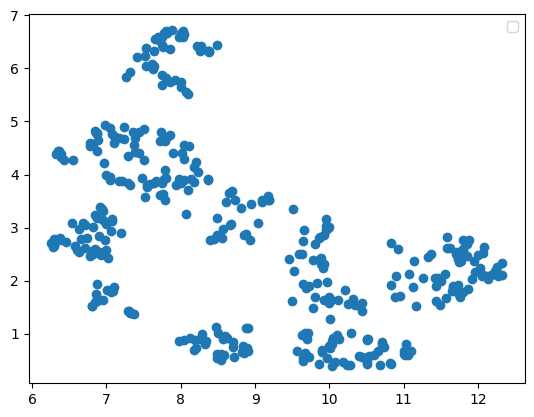

In [106]:
umap_run_2 = umap.UMAP(n_neighbors = 75, random_state = 0, min_dist=0.01).fit_transform(data_for_modeling)
plt.scatter(umap_run_2[:,0], umap_run_2[:,1])
plt.legend()
plt.show()

### 4.2.2. <a id='toc4_2_2_'></a>[KMeans](#toc0_)

The first algorithm we will run will once again be KMeans where we will perform the same exact process we performed earlier but now only for the remaining observations.

In [107]:
k_list = np.arange(1, 16)
inertia = []
for k in k_list:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data_for_modeling)
    inertia.append(kmeans.inertia_)

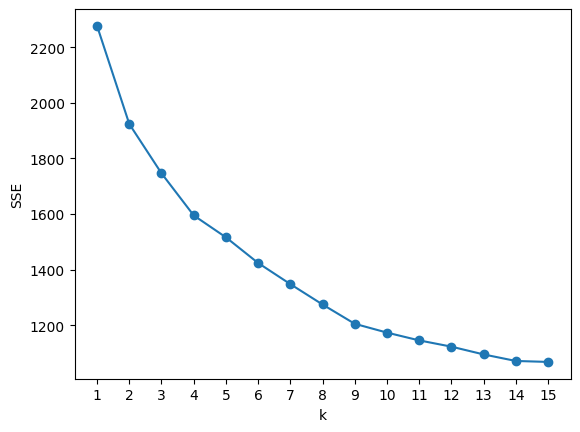

In [108]:
plt.plot(k_list, inertia, marker='o')
# define the label for x axis as 'k' (the number of clusters)
plt.xlabel('k')
# define the label for y axis as 'SSE' (the best metric for evaluating KMeans clustering, a.k.a Intertia)
plt.ylabel('SSE')
# define the ticks in x axis using the values of ks
plt.xticks(k_list)
# call plt.show()
plt.show()

There is a clear elbow at k=4, there are others at higher levels of k, but since we already have 5 definitive clusters, adding another 8/9 would be far too much, so we will stay with 4.

In [109]:
kmeans = KMeans(n_clusters=4, random_state=0)
unclassified_data['cluster_kmeans'] = kmeans.fit_predict(data_for_modeling)


In [110]:
cluster_kmeans2_size = unclassified_data.groupby('cluster_kmeans').size()
cluster_kmeans2_size

cluster_kmeans
0     80
1     79
2    105
3    135
dtype: int64

In [111]:
map_cluster_kmeans2 = {0: 'Winter Absences',
                      1: 'Near Weekend absences',
                      2: 'Short but expensive commutes',
                      3: 'Oldest employees'}
unclassified_data['cluster_kmeans_mapped'] = unclassified_data['cluster_kmeans'].map(map_cluster_kmeans2)

In [112]:
cluster_centroids_kmeans2 = unclassified_data.loc[:, cols_for_analysis + ['cluster_kmeans']].groupby('cluster_kmeans').mean().reset_index()
cluster_centroids_kmeans2['cluster_kmeans'] = cluster_centroids_kmeans2['cluster_kmeans'].map(map_cluster_kmeans2)
cluster_centroids_kmeans2.T

,0,1,2,3
cluster_kmeans,Winter Absences,Near Weekend absences,Short but expensive commutes,Oldest employees
transportation_expense,186.19,250.11,125.28,267.44
disciplinary_failure,0.01,0.06,0.06,0.10
number_of_children,0.33,2.84,0.70,1.39
number_of_pets,0.00,0.13,0.01,0.84
body_mass_index,20.68,23.67,28.26,29.43
absenteeism_time_in_hours,3.90,5.38,3.20,4.22
age,31.69,36.90,40.62,41.53
higher_education,0.79,0.10,0.00,0.00
commute_cost_per_km,7.62,6.88,11.05,9.75


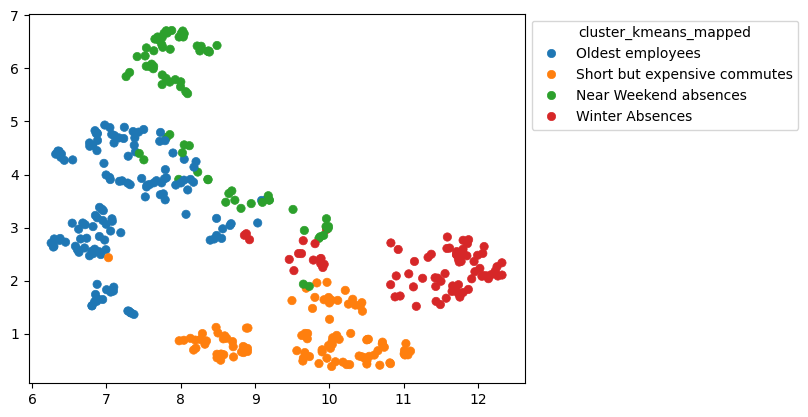

In [113]:
visualize_dimensionality_reduction(umap_run_2, unclassified_data['cluster_kmeans_mapped'])

In [114]:
silhouette_score(data_for_modeling, unclassified_data['cluster_kmeans_mapped'])

0.1452488589879208

Once again, the KMeans method gives us a good solution with some distinct and valuable clusters. Although the solution is not perfect, so we will test more methods once again.

### 4.2.3. <a id='toc4_2_3_'></a>[Hierarchical clustering](#toc0_)

Now, we will plot a new dendrogram for the remaining observations.

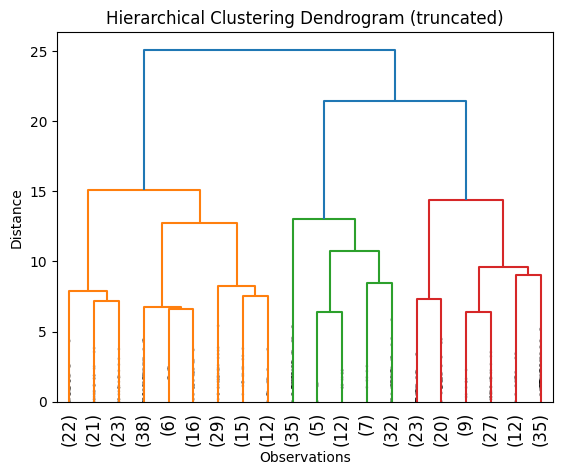

In [115]:
hierarchical = linkage(data_for_modeling, 'ward')
# define the title of the plot
plt.title('Hierarchical Clustering Dendrogram (truncated)')
# define the label for x axis
plt.xlabel('Observations')
# define the label for y axis
plt.ylabel('Distance')

# Draw the dendogram
dendrogram(
    hierarchical,
    truncate_mode='lastp',
    p=20,
    show_leaf_counts=True,
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,
)
plt.show()

Looking at the dendrogram it seems that 4 or 5 are good values for clustering. We'll test 5 clusters since the difference in distance between 4 and 5 clusters is really small.

In [116]:
hierarchical = AgglomerativeClustering(n_clusters=5, linkage='ward')
unclassified_data['cluster_hierarchical'] = hierarchical.fit_predict(data_for_modeling)

In [117]:
cluster_hierarchical1_size = unclassified_data.groupby('cluster_hierarchical').size()
cluster_hierarchical1_size

cluster_hierarchical
0     91
1    116
2     83
3     66
4     43
dtype: int64

In [118]:
map_cluster_hierarchical1 = {0: 'Older and less fit employees',
                      1: 'Somewhat educated employees' ,
                      2: 'High transportation expense',
                      3: 'Short but expensive commutes',
                      4: 'Near weekend absences'}
unclassified_data['cluster_hierarchical_mapped'] = unclassified_data['cluster_hierarchical'].map(map_cluster_hierarchical1)

In [119]:
cluster_centroids_hierarchical = unclassified_data.loc[:, cols_for_analysis + ['cluster_hierarchical']].groupby('cluster_hierarchical').mean().reset_index()
cluster_centroids_hierarchical['cluster_hierarchical'] = cluster_centroids_hierarchical['cluster_hierarchical'].map(map_cluster_hierarchical1)
cluster_centroids_hierarchical.T

,0,1,2,3,4
cluster_hierarchical,Older and less fit employees,Somewhat educated employees,High transportation expense,Short but expensive commutes,Near weekend absences
transportation_expense,198.22,195.86,285.17,125.85,260.00
disciplinary_failure,0.14,0.00,0.13,0.00,0.05
number_of_children,1.32,0.53,1.57,0.42,4.00
number_of_pets,0.48,0.02,0.94,0.00,0.00
body_mass_index,31.97,21.51,27.29,27.36,23.00
absenteeism_time_in_hours,3.34,4.27,4.63,3.73,4.98
age,48.16,34.06,36.61,36.36,36.00
higher_education,0.00,0.61,0.00,0.00,0.00
commute_cost_per_km,10.16,8.41,8.57,12.04,5.20


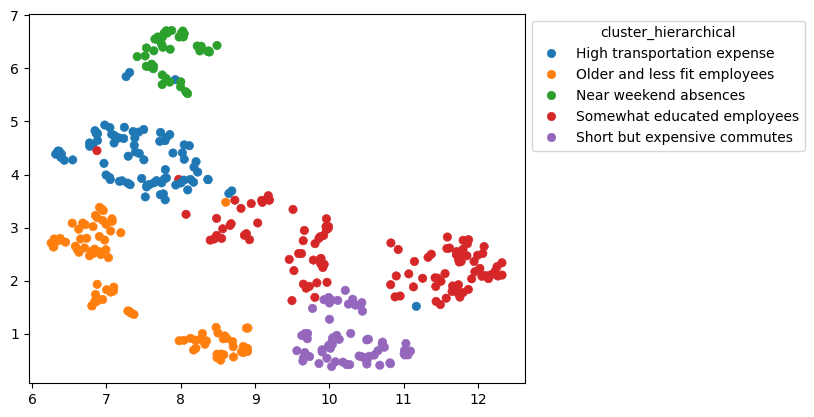

In [120]:
visualize_dimensionality_reduction(umap_run_2, unclassified_data['cluster_hierarchical'].map(map_cluster_hierarchical1))

In [121]:
silhouette_score(data_for_modeling, unclassified_data['cluster_hierarchical_mapped'])

0.12958440584449787

Looking at the cluster means and the UMAP dimensionality reduction, the results are decent, but we believe that KMeans gave us more representative clusters, while also allowing for one less cluster overall. The silhouette score supports this conclusion.

**Note:** We also tried 4 clusters here and the clusters showed similar separation in the UMAP reduction, but worse quality when looking at cluster characteristics.

### 4.2.4. <a id='toc4_2_4_'></a>[DBSCAN](#toc0_)

We'll now try a density-based method since perhaps these remaining observations may have more unorthodox or hard to uncover patterns which require this type of technique.

In [122]:
dbscan = DBSCAN(eps=1.5, min_samples=5,  n_jobs=-1)
unclassified_data['cluster_dbscan'] = dbscan.fit_predict(data_for_modeling)


In [123]:
unclassified_data.groupby('cluster_dbscan').size()

cluster_dbscan
-1     156
 0      65
 1      22
 2      45
 3      15
 4      21
 5      30
 6       6
 7      15
 8       5
 9       5
 10      7
 11      7
dtype: int64

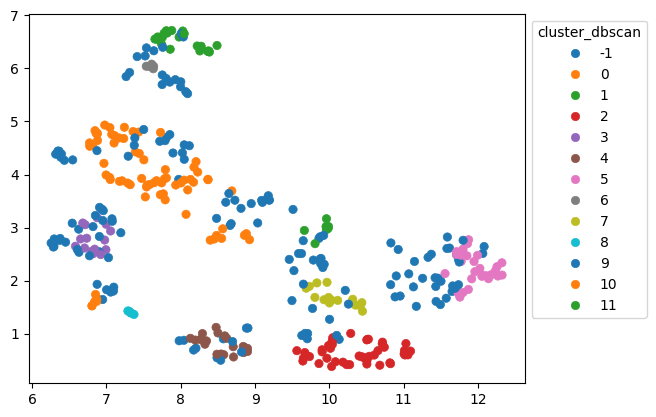

In [124]:
visualize_dimensionality_reduction(umap_run_2, unclassified_data['cluster_dbscan'])

In [125]:
silhouette_score(data_for_modeling, unclassified_data['cluster_dbscan'])

0.04313533674666182

Much like with the first run, through various parameter combinations, we were not able to produce any meaningful results using DBSCAN. One of 2 things happened, just like before:
+ We have tens of tiny clusters and most observations classified as outliers.
+ We have few outliers, but the data converges on a couple of low-quality clusters.

DBSCAN did find some patterns, but once again KMeans and Hierarchical methods outperformed it. The silhouette score reflects this.

### 4.2.5. <a id='toc4_2_5_'></a>[Analysis of second run](#toc0_)


Just like the first run, KMeans and Hierarchical methods provided the best results, which while not perfect, are likely close to the best we can get at this stage, as such we will compare their clusters assignments once again and decide on a model to classify our remaining observations.

In [126]:
# The reset_index, set_index sequence is only there to produce a better visual output
unclassified_data.groupby(['cluster_kmeans_mapped', 'cluster_hierarchical_mapped']).size().reset_index().set_index(['cluster_kmeans_mapped', 'cluster_hierarchical_mapped'])

0
cluster_kmeans_mapped        cluster_hierarchical_mapped     
Near Weekend absences        High transportation expense   15
                             Near weekend absences         43
                             Older and less fit employees   1
                             Somewhat educated employees   20
Oldest employees             High transportation expense   67
                             Older and less fit employees  56
                             Somewhat educated employees   12
Short but expensive commutes Older and less fit employees  34
                             Short but expensive commutes  66
                             Somewhat educated employees    5
Winter Absences              High transportation expense    1
                             Somewhat educated employees   79

Again the models agree on a lot of assignments, with a large majority of the disparity coming from the different number of clusters (4 vs 5). Overall, we believe that KMeans provides slightly more meaningful patterns with one less cluster overall, so we'll use this KMeans solution to finalize our clusters.

In [127]:
unclassified_data.rename({'cluster_kmeans_mapped' : 'Final_Cluster'}, axis=1, inplace=True)
cluster_vars = list(unclassified_data.columns[unclassified_data.columns.str.startswith('cluster')]) 
unclassified_data.drop(cluster_vars, axis=1, inplace=True)
classified_data = pd.concat([classified_data, unclassified_data]).sort_index()

Let's just look at the silhouette score of our final solution.

In [128]:
# Obtaining the original modeling data since we had removed observations
og_modeling_data = pd.read_csv('data_for_modeling.csv', index_col=0)

In [129]:
silhouette_score(og_modeling_data, classified_data['Final_Cluster'])

0.18980977870448076

The score is slightly higher, but very close, to the original KMeans, this is good since it means that our two-phased approach not only allowed us more testing opportunities but actually resulted in better clusters (according to the silhouette score.) <p>
We'll now export our final cluster assignments so that we can perform a final analysis in the "Cluster_analysis" notebook. Please move to that notebook after finishing this one. The final section of this notebook is simply an extra element.

In [130]:
classified_data.to_csv('classified_data.csv')

# 5. <a id='toc5_'></a>[Cluster Variable Importance](#toc0_)

As a final section of our clustering notebook, we will now use a RandomForest to estimate which of our variables have more impact in the separation of our clusters.

In [131]:
model_final=RandomForestClassifier(random_state = 0)

model_fited =  model_final.fit(og_modeling_data, classified_data.Final_Cluster)

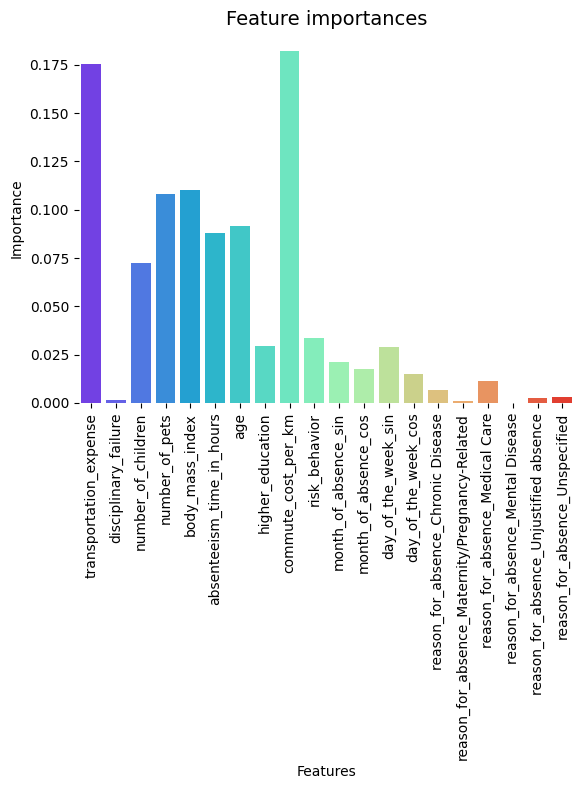

In [132]:
# Creating importances_df dataframe
importances_df = pd.DataFrame({"feature_names" : list(og_modeling_data.columns),
                               "importances" : model_final.feature_importances_})

# Plotting bar chart, g is from graph
fig = sns.barplot(x=importances_df["feature_names"],
                y=importances_df["importances"], palette='rainbow')
fig.set_title("Feature importances", fontsize=14)
sns.despine(bottom=True, left=True)
plt.xticks(rotation=90)
fig.set(xlabel='Features', ylabel='Importance')
plt.show()

We can conclude that:
+ The "commute_cost_per_km" and "transportation_expense" were the two most impactful variables for creating our clusters.
+ The month, weekday and reason variables have low but not null importance, meaning they contained some information that helped us reach our clusters.
+ Disciplinary failure has essentially no importance.
+ All other variables has moderate importance in the discovery of our clusters.